# Shapley effects

In [1]:
import numpy as np
import pandas as pd
import openturns as ot

import matplotlib.pyplot as plt
from otshapley.plots import set_style_paper, plot_sensitivity_results
set_style_paper()

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Custom Framework

In [2]:
from otshapley.model import ProbabilisticModel

def test_func(X):
    """Linera model function
    """
    X = np.asarray(X)
    dim = X.shape[1]
    coef = np.arange(1, dim+1)
    return X.dot(coef)

dim = 3
margins = [ot.Uniform()]*dim
copula = ot.NormalCopula(dim)
input_distribution = ot.ComposedDistribution(margins, copula)
model = ProbabilisticModel(model_func=test_func, input_distribution=input_distribution)

### Monte-Carlo estimation using true model

In [3]:
%%time
from otshapley import ShapleyIndices
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_perms = None
n_var = 1000
n_outer = 100
n_inner = 3

budget_perms = np.math.factorial(dim) if n_perms is None else n_perms
max_budget = n_var + n_outer * n_inner * budget_perms * (dim - 1)
print('Max budget:', max_budget)

shapley = ShapleyIndices(model.input_distribution)
shapley.build_sample(model=model, n_perms=n_perms, n_var=n_var, n_outer=n_outer, n_inner=n_inner)

Max budget: 4600
CPU times: user 1.22 s, sys: 152 ms, total: 1.38 s
Wall time: 721 ms


In [4]:
%%time
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_boot = 500
shapley_results = shapley.compute_indices(n_boot=n_boot)

CPU times: user 149 ms, sys: 797 µs, total: 149 ms
Wall time: 156 ms


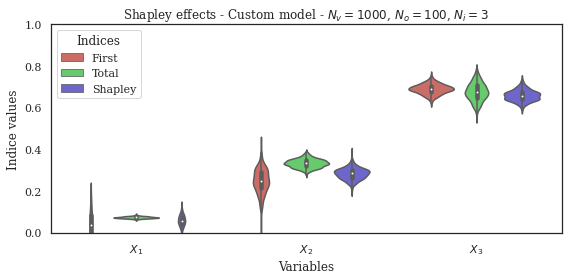

In [5]:
from otshapley.plots import plot_sensitivity_results
ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(shapley_results, indice='all', ax=ax)
ax.set_title("Shapley effects - {} model - $N_v={}$, $N_o={}$, $N_i={}$".format(model.name, n_var, n_outer, n_inner))
ax.set_ylim(ylim)
fig.tight_layout()